In [1]:
from proj1_helpers import *
from implementations import *
from costs import *
from helper import *
from plots import *

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = 'data/'
PREDICTION_PATH = 'predictions/'

In [78]:
y_tr, x_tr, ids_tr = load_csv_data(DATA_PATH + "train.csv")
y_te, x_te, ids_te = load_csv_data(DATA_PATH + "test.csv")

In [74]:
x_tr_0, y_tr_0, x_tr_1, y_tr_1, x_tr_2, y_tr_2, x_tr_3, y_tr_3, x_te_0, x_te_1, x_te_2, x_te_3, jet_num_te = preprocess_datasets(x_tr, y_tr, x_te, y_te)

In [52]:
def apply_least_squares(x, y, degree):
    degrees = np.arange(degree) + 1
    losses = []
    weights = []
    poly = np.ones((x.shape[0], 1))

    for degree in degrees:
        poly = fast_build_poly(x, poly, degree)
        w, loss = least_squares(y, poly)
        weights.append(w)
        losses.append(compute_categorical_loss(y, poly, w)) 
    
    plt.plot(degrees, losses, 'r') 
    plt.xlabel('Degree')
    plt.ylabel('Error')
    plt.show()
    print('Min =', min(losses))
    print('Best degree =', losses.index(min(losses)) + 1)
    
    return weights

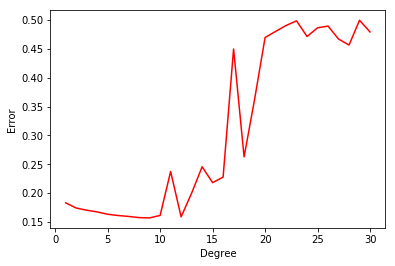

Min = 0.1569265260776876
Best degree = 9


In [53]:
w_0 = apply_least_squares(x_tr_0, y_tr_0, 30)

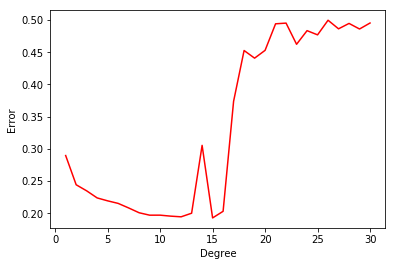

Min = 0.19276797689053957
Best degree = 15


In [54]:
w_1 = apply_least_squares(x_tr_1, y_tr_1, 30)

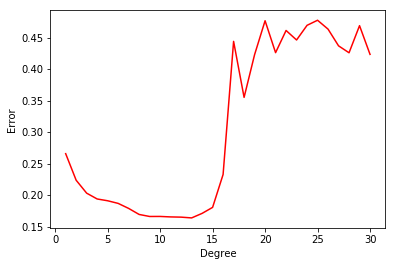

Min = 0.1638182576073364
Best degree = 13


In [55]:
w_2 = apply_least_squares(x_tr_2, y_tr_2, 30)

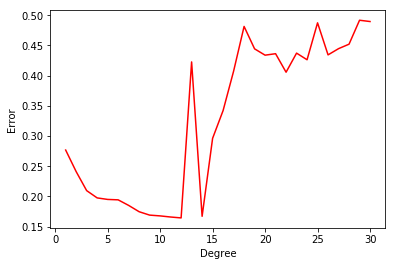

Min = 0.16454611081032305
Best degree = 12


In [56]:
w_3 = apply_least_squares(x_tr_3, y_tr_3, 30)

In [57]:
w_0, _ = least_squares(y_tr_0, build_poly(x_tr_0, 9))
w_1, _ = least_squares(y_tr_1, build_poly(x_tr_1, 15))
w_2, _ = least_squares(y_tr_2, build_poly(x_tr_2, 13))
w_3, _ = least_squares(y_tr_3, build_poly(x_tr_3, 12))

In [60]:
y_te_0 = predict_labels(w_0, build_poly(x_te_0, 9))
y_te_1 = predict_labels(w_1, build_poly(x_te_1, 15))
y_te_2 = predict_labels(w_2, build_poly(x_te_2, 13))
y_te_3 = predict_labels(w_3, build_poly(x_te_3, 12))

In [80]:
predicted_y_te = []
i_0, i_1, i_2, i_3 = 0, 0, 0, 0
for jet_num in jet_num_te:
    if jet_num == 0:
        predicted_y_te.append(y_te_0[i_0])
        i_0 += 1
    elif jet_num == 1:
        predicted_y_te.append(y_te_1[i_1])
        i_1 += 1
    elif jet_num == 2:
        predicted_y_te.append(y_te_2[i_2])
        i_2 += 1
    else:
        predicted_y_te.append(y_te_3[i_3])
        i_3 += 1

In [83]:
create_csv_submission(ids_te, predicted_y_te, PREDICTION_PATH + "output.csv")